<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\admin\AppData\Local\Temp\ipykernel_21392\1291132016.py:8: SyntaxWarning: invalid escape sequence '\S'
  Customer = pd.read_excel('D:\Study\File Mugen\Mugen\python\Data\Customer Monthly Demand.xlsx', sheet_name=None)


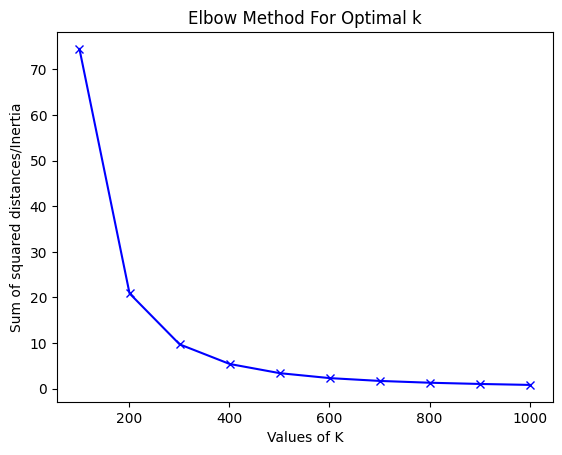

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Step 1: Create a DataFrame
Customer = pd.read_excel('D:\Study\File Mugen\Mugen\python\Customer Monthly Demand.xlsx', sheet_name=None)
Coord = Customer.get('Coordinate')
Sum_of_squared_distances = []
K=range (101,1101,100)

# Step 2: Prepare the data for clustering
X = Coord[['Latitude', 'Longitude']]

# Step 3: Elbow Method to Determine the Cluster value
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

This code above is to determine number of cluster proper for the population
Below the clustering result applied to existing customer demand data (My CPU can't handle for 30k data)

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=301, random_state=42)  # You can change the number of clusters here
Coord['Cluster'] = kmeans.fit_predict(Coord[['Latitude', 'Longitude']])

# Get the centroids (Longitude, Latitude)
centroids = kmeans.cluster_centers_

# Create a DataFrame for the centroids with Longitude and Latitude columns
centroid_df = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])

# Set the index to the cluster number
centroid_df['Cluster'] = centroid_df.index

# Re-arrange the DataFrame to have 'Cluster' as the first column
centroid_df = centroid_df[['Cluster', 'Latitude', 'Longitude']]

# Save the centroid data to an Excel file or display
centroid_df.to_excel('centroids.xlsx', index=False)

# Print the centroid data
print("Centroids (Longitude and Latitude) for each cluster:")
print(centroid_df)

In [52]:
import numpy as np
from geopy.distance import geodesic as GD
import pandas as pd
df = pd.read_excel(r'MAS case study student.xlsx', sheet_name=['Customer Final','DC Final','Customer Code'])
C_code = pd.read_excel(r'centroids.xlsx')

# Reading data and processing data average numbers
DC = df.get('DC Final')
kalimantan = ['East Kalimantan','West Kalimantan']

#DC Processing, 1 time
DC=DC[DC['Distributor Area']=='Kalimantan']
DC_Depo=DC[DC['Type']=='Depo']
DC_DirectDC=DC[DC['Type']=='Direct DC']

dist_matrix = np.zeros((len(C_code),len(DC)))
dist_matrix_DC = np.zeros((len(DC),len(DC)))
#C_code.set_index('Customer ID',inplace=True)
for i in range(len(C_code)):
    for j in range (len(DC)):
        # Get customer and DC coordinates (assuming 'Latitude' and 'Longitude' are at the given indices)
        customer_coords = (C_code.iloc[i, 0], C_code.iloc[i, 1])  # 'Latitude' and 'Longitude' for customer
        dc_coords = (DC.iloc[j, 8], DC.iloc[j, 9])  # 'Latitude' and 'Longitude' for DC

        #Compute and record distance using geodesic
        dist_matrix[i, j] = GD(customer_coords, dc_coords).km
for i in range(len(DC)):
    for j in range(len(DC)):
        dc_coords_1= (DC.iloc[i, 8], DC.iloc[i, 9])  # 'Latitude' and 'Longitude' for DC
        dc_coords_2= (DC.iloc[j, 8], DC.iloc[j, 9])  # 'Latitude' and 'Longitude' for DC

        
        #Compute and record distance using geodesic
        dist_matrix_DC[i, j] = GD(dc_coords_1, dc_coords_2).km


In [53]:
dc_labels = [f"{DC.iloc[j, 0]}_{DC.iloc[j, 5]}" for j in range(len(DC))]  # Concatenate 'Area' and 'Type'

dist_cus_df = pd.DataFrame(dist_matrix, columns=dc_labels, index=C_code.index)
dist_DC_df = pd.DataFrame(dist_matrix_DC, columns=dc_labels, index=dc_labels)

dist_cus_df.to_csv('Customer_DC_Matrix_Clustered.csv')
dist_DC_df.to_csv('DC_DC_Matrix.csv')

In [34]:
Demand = Customer.get('Average')
Demand['Cluster']=Coord['Cluster']
Demand=Demand.groupby('Cluster').sum()
Demand=Demand['Average Monthly']
Demand = pd.DataFrame(Demand)
Demand.to_excel(r'Customer Monthly Demand Clustered.xlsx')